In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
from scipy.optimize import fsolve
print("Succesfully imported %s"%fsolve.__name__)
from scipy.signal import find_peaks
print("Succesfully imported %s"%find_peaks.__name__)
from scipy.linalg import orth
print("Succesfully imported %s"%orth.__name__)
from scipy.integrate import odeint
print("Succesfully imported %s"%odeint.__name__)
from matplotlib import cm
from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid
import time
from autograd import grad, jacobian

Succesfully imported numpy -- Version: 1.19.5
Succesfully imported scipy -- Version: 1.5.0
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.0.5
Succesfully imported sympy -- Version: 1.6.1
Succesfully imported scipy.optimize
Succesfully imported fsolve
Succesfully imported find_peaks
Succesfully imported orth
Succesfully imported odeint


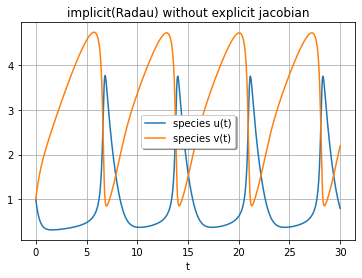

number of function evaluations:  9973
Time taken:  0.7014849185943604 



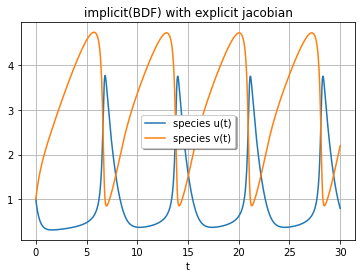

number of function evaluations:  4778
Time taken:  0.3195772171020508 



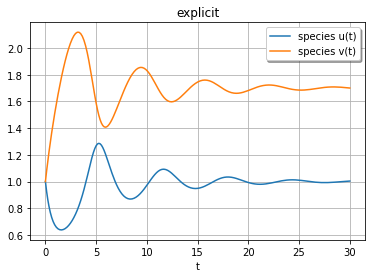

number of function evaluations:  890
Time taken:  0.013444900512695312 



In [2]:
#solve_ivp

# parameter values 
a1=1; b1=3;
a2=1; b2=1.7;

#RHS Function for coupled ODE system-Brusselator example from wiki 
def func1(t, u):
    X, Y = u
    du1 = a1 + X*X*Y - b1*X - X 
    du2 = b1*X - X*X*Y 
    return [du1, du2]

def func2(t, u):
    X, Y = u
    du1 = a2 + X*X*Y - b2*X - X 
    du2 = b2*X - X*X*Y 
    return [du1, du2]

#..set initial conditions 
u0 = [1.0, 1.0];

#provide Jacobian
def jac1(u,t):
    J = [[b1-1,-a1*a1],[-b1,a1*a1]]
    return J

#solve ODEs
#implicit without jacobian
start1 = time.time()
sol1 = scipy.integrate.solve_ivp(func1, t_span=[0,30], y0=u0,  method = 'Radau', dense_output=True, atol=1e-8, rtol=1e-8);
end1 = time.time()
dt1 = end1-start1

#implicit with jacobian
start2 = time.time()
sol11= scipy.integrate.solve_ivp(func1, t_span=[0,30], y0=u0,  method = 'BDF', jac=jac1, dense_output=True, atol=1e-8, rtol=1e-8);
end2 = time.time()
dt2 = end2-start2

#explicit without jacobian
start3 = time.time()
sol2 = scipy.integrate.solve_ivp(func2, t_span=[0,30], y0=u0, dense_output=True, atol=1e-8, rtol=1e-8);
end3 = time.time()
dt3 = end3-start3

#time sampling for post-processing 
t_axis = np.linspace(0, 30, 101);
#times step used by the solver
#plot solution
ans = sol1.y

plt.plot(sol1.t, ans.T)
plt.legend(['species u(t)', 'species v(t)'], shadow=True)
plt.xlabel('t')
plt.title('implicit(Radau) without explicit jacobian')
plt.grid()
plt.show()
print("number of function evaluations: " ,sol1.nfev)
print("Time taken: ",dt1, '\n')

ans = sol11.y
plt.plot(sol11.t, ans.T)
plt.legend(['species u(t)', 'species v(t)'], shadow=True)
plt.xlabel('t')
plt.title('implicit(BDF) with explicit jacobian')
plt.grid()
plt.show()
print("number of function evaluations: " ,sol11.nfev)
print("Time taken: ",dt2, '\n')

ans2 = sol2.y
plt.plot(sol2.t, ans2.T)
plt.legend(['species u(t)', 'species v(t)'], shadow=True)
plt.xlabel('t')
plt.title('explicit')
plt.grid()
plt.show()
print("number of function evaluations: " ,sol2.nfev)
print("Time taken: ",dt3, '\n')

#is explicit method cheaper? Number of function evaluation



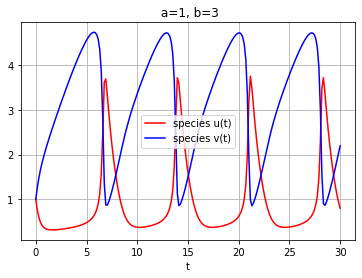

number of function evaluations:  200
Time taken:  0.020903825759887695


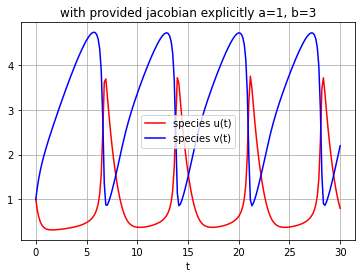

number of function evaluations:  200
Time taken:  0.008775949478149414


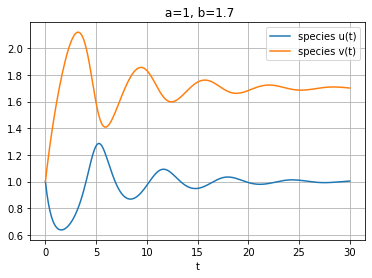

Time taken:  0.013444900512695312


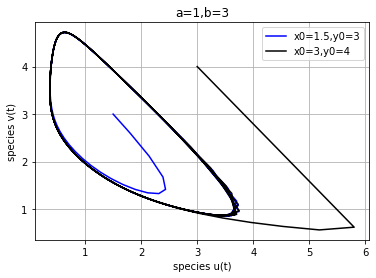

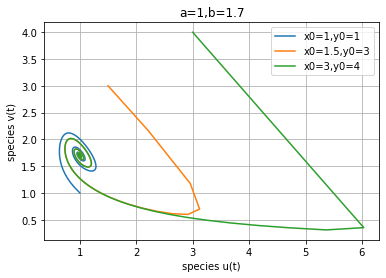

In [3]:
#using odeint
def func(u, t, a, b):
    X, Y = u
    du1 = a + X*X*Y - b*X - X 
    du2 = b*X - X*X*Y 
    return [du1, du2]

#parameter values 
a1=1; b1=3;
a2=1; b2=1.7;

#initial conditions 
u0 = [1.0, 1.0];
u1 = [1.5, 3];
u2 = [3,4];

#time interval 
t = np.linspace(0, 30, 201);

#provide Jacobian
def jac1(u,t,a1,b1):
    X,Y=u
    J = [[b1-1,-a1*a1],[-b1,a1*a1]]
    return J

#solve ODE
#without explicit jacobian
start1 = time.time()
sol1, infodict1 = odeint(func, u0, t, args=(a1, b1), full_output=1);
end1 = time.time()
dt1 = end1-start1

#with explicit jacobian
start2 = time.time()
y, infodict2 = odeint(func, u0, t,args =(a1,b1), Dfun=jac1, full_output=1)
end2 = time.time()
dt2 = end2-start2

sol2 = odeint(func, u0, t, args=(a2, b2), full_output=1);
end1 = time.time()
dt1 = end1-start1

#..plot solution obtained 
plt.plot(t, sol1[:, 0], 'r', label='species u(t)')
plt.plot(t, sol1[:, 1], 'b', label='species v(t)')
plt.legend(loc='best')
plt.title(" a=1, b=3")
plt.xlabel('t')
plt.grid()
plt.show()
print("number of function evaluations: " ,len(infodict1['hu']))
print("Time taken: ",dt1)

plt.plot(t, y[:,0], 'r', label='species u(t)')
plt.plot(t, y[:,1], 'b', label='species v(t)')
plt.legend(loc='best')
plt.title("with provided jacobian explicitly a=1, b=3")
plt.xlabel('t')
plt.grid()
plt.show()
print("number of function evaluations: " ,len(infodict2['hu']))
print("Time taken: ",dt2)

plt.plot(t, sol2[0][:, 0], label='species u(t)')
plt.plot(t, sol2[0][:, 1], label='species v(t)')
plt.legend(loc='best')
plt.title(" a=1, b=1.7")
plt.xlabel('t')
plt.grid()
plt.show()
print("Time taken: ",dt3)

#solution behaviors for different initial conditions
sol3 = odeint(func, u1, t, args=(a1, b1), full_output=1, printmessg=0);
sol4 = odeint(func, u2, t, args=(a1, b1), full_output=1, printmessg=0);

plt.plot(sol3[0][:, 0], sol3[0][:, 1],'b', label='x0=1.5,y0=3')
plt.plot(sol4[0][:, 0], sol4[0][:, 1],'black', label='x0=3,y0=4')
plt.title('a=1,b=3')
plt.legend(loc='best')
plt.xlabel('species u(t)')
plt.ylabel('species v(t)')
plt.grid()
plt.show()


sol5 = odeint(func, u1, t, args=(a2, b2), full_output=1, printmessg=0);
sol6 = odeint(func, u2, t, args=(a2, b2), full_output=1, printmessg=0);
plt.plot(sol2[0][:, 0], sol2[0][:, 1], label='x0=1,y0=1')
plt.plot(sol5[0][:, 0], sol5[0][:, 1], label='x0=1.5,y0=3')
plt.plot(sol6[0][:, 0], sol6[0][:, 1], label='x0=3,y0=4')
plt.title('a=1,b=1.7')
plt.legend(loc='best')
plt.xlabel('species u(t)')
plt.ylabel('species v(t)')
plt.grid()
plt.show()



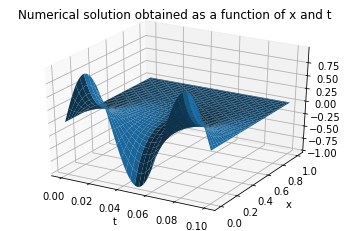

In [4]:
#practice
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy import integrate

x = np.linspace(0,1,101)
t = np.linspace(0,0.1,101)
k = 3

XX, TT = np.meshgrid(x,t)
u0= np.sin(k*np.pi*x)

def h(t,u):
    N = 100
    h = 1/N
    A = np.zeros([N+1, N+1])
    for i in range(1,N):
        A[i,i-1:i+2] = [(1/(h**2)), (-2/(h**2)), (1/(h**2))]
        A[0,0] = 1
        A[-1,-1] = 1
    dudt = np.dot(A,u)
    return dudt

sol=integrate.solve_ivp(h,t_span=[0,0.1],y0=u0,t_eval=t)
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(TT,XX,sol.y)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Numerical solution obtained as a function of x and t')
plt.show()


In [5]:
#diffusion matrix practice
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

N = 4

A = poisson_1d(N)
print(A)

[[  1.   0.   0.   0.   0.]
 [-16.  32. -16.   0.   0.]
 [  0. -16.  32. -16.   0.]
 [  0.   0. -16.  32. -16.]
 [  0.   0.   0.   0.   1.]]


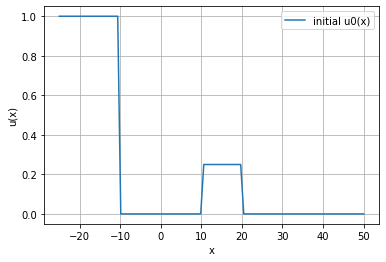

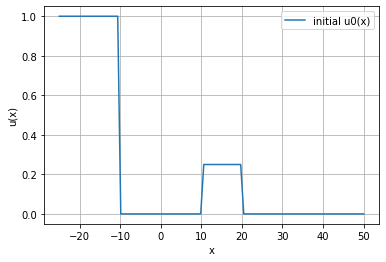

In [9]:
#fischer equation in x and t
nsamples = 100 
x_vec = np.linspace(-25,50,nsamples)
u0 = (x_vec<=-10)+0.25*((10<=x_vec)*(x_vec<=20))

#my simple code - just to see if I understood correctly
U0 = np.zeros(100)
for i in range(100):
    if x_vec[i] <=-10:
        U0[i] = 1
    elif x_vec[i] >10 and x_vec[i] <20 :
        U0[i] = 0.25
#plot the computed solution 
plt.plot(x_vec,u0,label='initial u0(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.plot(x_vec,U0,label='initial u0(x)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(loc='best')
plt.grid()
plt.show()


(101, 41)


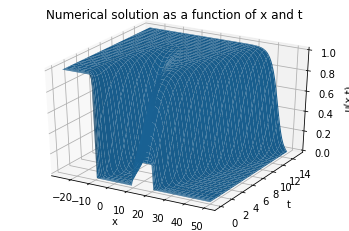

In [6]:
#solving reaction-diffusion fischer equation with odeint and solve_ivp
def poisson_1d(N):
    h = 75/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=0; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=0; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def righthandside_dt(t,u,A):
    dudt = -np.dot(A,u) + u*(1-u)
    return dudt

N = 100

A = poisson_1d(N)

#initial guess   
xvec = np.linspace(-25,50,N+1)
u0 = (xvec<=-10)+0.25*((10<=xvec)*(xvec<=20))

#time integration  
computed = scipy.integrate.solve_ivp(righthandside_dt,args=(A,),t_span=[0,15],y0=u0)

#..prepare variables for plotting 
t = computed.t
XX, TT = np.meshgrid(xvec,t[1:])

#..post-processing 
fig = plt.figure()
axes = fig.gca(projection='3d')
z = computed.y[:,1:]
print(np.shape(z))
axes.plot_surface(XX,TT,z.T)
axes.set_xlabel('x')
axes.set_ylabel('t')
axes.set_zlabel('u(x,t)')
axes.set_title('Numerical solution as a function of x and t')
plt.show()

(41, 29)


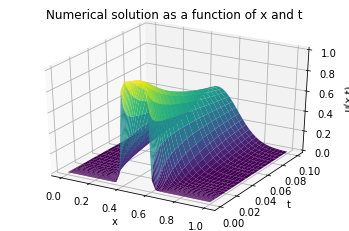

In [7]:
#Fischer equation with solve_ivp
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def righthandside_dt(t,u,A):
    dudt = -0.1*np.dot(A,u)+u*(u-.4) #diffusion + reaction
    return dudt

N = 40

A = poisson_1d(N)

# define right-hand side vector 
x = np.linspace(0,1,N+1) #spatial mesh
u0 = (x>=0.4)*(x<=0.6) #changed limits and values from the previous case

#perform time integration  
computed = scipy.integrate.solve_ivp(righthandside_dt,args=(A,),t_span=[0,0.1],y0=u0, rtol=1e-6, atol=1e-6)
#sol1 = odeint(righthandside_dt, u0, t, args=(A,), full_output=1, printmessg=0) #provide Jacobian here
#plotting 
t = computed.t
XX, TT = np.meshgrid(x,t[1:])

#post-processing 
fig = plt.figure()
axes = fig.gca(projection='3d')
z = computed.y[:,1:]
print(np.shape(z))
axes.plot_surface(XX,TT,z.T,cmap='viridis',linewidth=0)
axes.set_xlabel('x')
axes.set_ylabel('t')
axes.set_zlabel('u(x,t)')
axes.set_title('Numerical solution as a function of x and t')
plt.show()

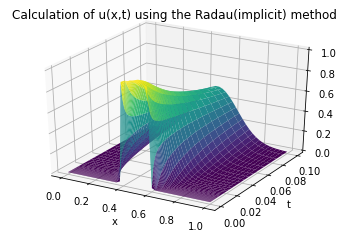

In [29]:
#my code
T=0.1
M=20
N=40
dt=T/M

x = np.linspace(0, 1, N+1)
t = np.linspace(0, 0.1, M+1)
tt,xx=np.meshgrid(t,x)

u=np.zeros((N+1,M+1))
U0=(x>=0.4)*(x<=0.6) #initial value
ans=np.zeros((N+1,M+1))
#poisson 1D
def poisson1(t,u):
    N = 40
    h = 1/N
    A = np.zeros([N+1, N+1])
    for i in range(1,N):
        A[i,i-1:i+2] = [(-1/(h**2)), (2/(h**2)), (-1/(h**2))]
        A[0,0] = 1
        A[-1,-1] = 1
    return A

#fischer equation
def func(t,u,A):
    dudt = -0.1*np.dot(A,u)+u*(u-0.4)
    return dudt
A = poisson1(t,u)

sol = scipy.integrate.solve_ivp(func,args=(A,),t_span=[0,0.1],y0=U0,method='Radau',rtol=1e-8, atol=1e-8)
t = sol.t
XX, TT = np.meshgrid(x,t[1:])

fig = plt.figure()
ax=fig.gca(projection='3d')
z = sol.y[:,1:]
ax.plot_surface(XX,TT,z.T,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.title('Calculation of u(x,t) using the Radau(implicit) method')
plt.show()



(41, 21)


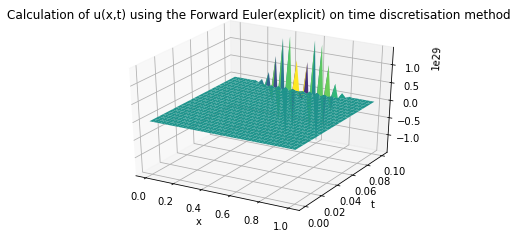

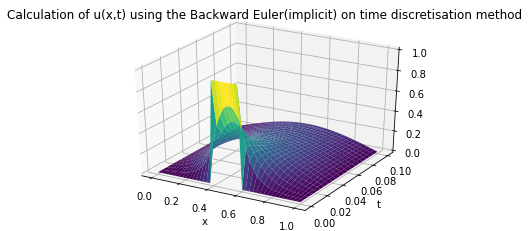

In [34]:
#solving fischer equation using time discretisation forward
T=0.1
M=20
N=40
dt=T/M

x = np.linspace(0, 1, N+1)
t = np.linspace(0, 0.1, M+1)
tt,xx=np.meshgrid(t,x)
I=np.identity(41)
u=np.zeros((N+1,M+1))
u[:,0]=(x>=0.4)*(x<=0.6)
print(u.shape)
ans=np.zeros((N+1,M+1))
def func(t,u):
    N = 40
    h = 1/N
    A = np.zeros([N+1, N+1])
    for i in range(1,N):
        A[i,i-1:i+2] = [(-1/(h**2)), (2/(h**2)), (-1/(h**2))]
        A[0,0] = 1
        A[-1,-1] = 1
    
    
    
    return A
A=func(t,u)
inverse=np.linalg.inv(I+dt*A)
for i in range(0,M):
        
    u[:,i+1]=np.dot(I+dt*A,u[:,i])
    
fig = plt.figure()
ax=fig.gca(projection='3d')
ax.plot_surface(xx,tt,u, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.title('Calculation of u(x,t) using the Forward Euler(explicit) on time discretisation method')
plt.show()

def func(t,u):
    N = 40
    h = 1/N
    A = np.zeros([N+1, N+1])
    for i in range(1,N):
        A[i,i-1:i+2] = [(1/(h**2)), (2/(h**2)), (-1/(h**2))]
        A[0,0] = 1
        A[-1,-1] = 1

for i in range(0,M):
        
    u[:,i+1]=np.dot(inverse,u[:,i])
    
    
fig = plt.figure()
ax=fig.gca(projection='3d')
ax.plot_surface(xx,tt,u, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.title('Calculation of u(x,t) using the Backward Euler(implicit) on time discretisation method')
plt.show()

In [10]:
T=0.1
M=20
N=40
dt=T/M


t = np.linspace(0, 0.1, M+1)
tt,xx=np.meshgrid(t,x)
def poisson_1D(N):
    h = 1/N
    A = np.zeros([N+1, N+1])
    for i in range(1,N):
        A[i,i-1:i+2] = [(-1/(h**2)), (2/(h**2)), (-1/(h**2))]
        A[0,0] = 1 # handling left-most Dirchlet boundary condition 
        A[-1,-1] = 1 # handling right-most Dirchlet boundary condition 
    
    
    
    return A
N=4
A=poisson_1D(N)
x = np.linspace(0, 1, N+1)

def rhs_dt(t,u,A):
    n=np.size(u)
    uu = u[:n//2]; vv = u[n//2:]
    duudt = - 0.1*np.dot(A,uu)  + uu**2 # equation for species u
    dvvdt = - 0.1*np.dot(A,vv)  + vv**2 # equation for species v
    dudt = np.concatenate([uu,vv])
    return dudt


#rhs vector
k = 3; uu0 = np.sin(k*np.pi*x)
k = 5; vv0 = np.sin(k*np.pi*x)
u0 = np.concatenate([uu0,vv0])#initial values

computed = rhs_dt(t,u0,A)

display(computed)

array([ 0.00000000e+00,  7.07106781e-01, -1.00000000e+00,  7.07106781e-01,
        3.67394040e-16,  0.00000000e+00, -7.07106781e-01,  1.00000000e+00,
       -7.07106781e-01,  6.12323400e-16])

(42, 5396)


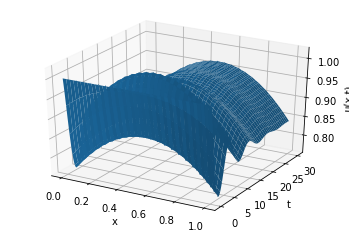

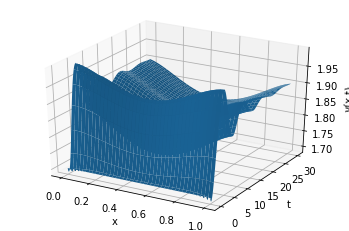

In [20]:
#time integration with post processing of two-species

#poisson matrix
def poisson_1D(N): #spatial variation in 1 direction- just diffusion
    h = 1/N
    A = np.zeros([N+1, N+1])
    for i in range(1,N):
        A[i,i-1:i+2] = [(-1/(h**2)), (2/(h**2)), (-1/(h**2))]
        A[0,0] = 1
        A[-1,-1] = 1
    return A

#brusselator equation just reaction, no diffusion; used before
def brus_ode(t,u, a, b):
    X,Y=u
    du = a + X*X*Y - b*X - X 
    dv = b*X - X*X*Y
    return [du,dv]

#introducing diffusion 
def re_di_eq(t,u,A):
    a = 1; b = 3;
    b = 1.7; 
    D1 = 0.008; D2 = 0.004; l = 0.3;  #diffusion parameters
    n = np.size(u)
    uu = u[:n//2]; vv = u[n//2:];     
    duudt = -(D1/l**2)*np.dot(A,uu) + a + uu**2*vv - b*uu - uu #diffusion + reaction
    dvvdt = -(D2/l**2)*np.dot(A,vv) + b*uu - uu**2*vv #diffusion + reaction
    dudt = np.concatenate([duudt,dvvdt])
    return dudt

N = 41
Np1 = N+1
A = poisson_1d(N)

#initial conditions for rhs vector
x = np.linspace(0,1,N+1)
a = 1 #alpha
b = 1.7 #beta
uu0 = a*np.ones(np.size(x))
vv0 = (b/a)*np.ones(np.size(x))
u0 = np.concatenate([uu0,vv0])

#time integration  
sol = scipy.integrate.solve_ivp(re_di_eq,args=(A,),t_span=[0,30],y0=u0)

#plotting 
t = sol.t
xx,tt = np.meshgrid(x,t)
zu = sol.y[:Np1,:]
zv = sol.y[Np1:,:]
print(np.shape(zu))

#post-processing 
fig = plt.figure()
ax1 = fig.gca(projection='3d')
ax1.plot_surface(xx,tt,zu.T)
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x,t)')
plt.show() 
fig = plt.figure()
ax2 = fig.gca(projection='3d')
ax2.plot_surface(xx,tt,zv.T)
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('v(x,t)')
plt.show()




In [13]:
# define the PDE
a, b = 1, 3
d0, d1 = 1, 0.1
eq = PDE(
    {
        "u": f"{d0} * laplace(u) + {a} - ({b} + 1) * u + u**2 * v",
        "v": f"{d1} * laplace(v) + {b} * u - u**2 * v",
    }
)

# initialize state
grid = UnitGrid([64,64])
u = ScalarField(grid, a, label="Field $u$")
v = b / a + 0.1 * ScalarField.random_normal(grid, label="Field $v$")
state = FieldCollection([u, v])

# simulate the pde
tracker = PlotTracker(interval=1, plot_args={"vmin": 0, "vmax": 5})
sol = eq.solve(state, t_range=20, dt=1e-3, tracker=tracker)

#we can see periodic/oscillating simulations in both the fields for a =1, b=3. however for a = 1 and b = 1.7, you cannot see any chnages happening as time passes.


Output()

Spent more time on handling trackers (16.307177999999997) than on the actual simulation (10.020374000000004)
